In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
path = r'C:\Users\siram\OneDrive\Desktop\data uefa'

In [39]:
df = pd.read_csv(os.path.join(path,'key_stats.csv'), index_col = False)

In [7]:
df.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


In [8]:
# Create a correlation matrix using pandas

df.corr()

,minutes_played,match_played,goals,assists
minutes_played,1.000000,0.886601,0.338638,0.377284
match_played,0.886601,1.000000,0.371301,0.401274
goals,0.338638,0.371301,1.000000,0.355601
assists,0.377284,0.401274,0.355601,1.000000


In [9]:
# Create a subset 

sub = df[['player_name', 'club', 'position', 'minutes_played', 'match_played', 'goals', 'assists', 'distance_covered']]

In [10]:
sub

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4
...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2


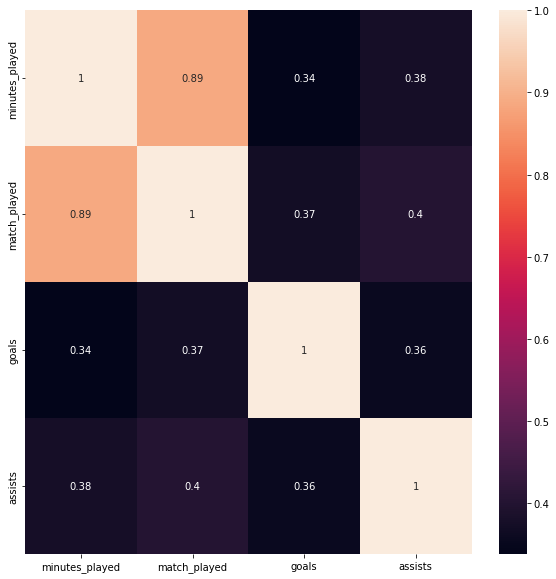

In [11]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [ ]:
## There is a weak correlation (0.36) between goals and assists and there is a strong relationship between minutes and match played.

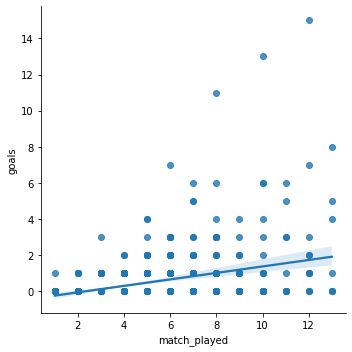

In [12]:
# Create a scatterplot for the "goals" and "match_played" columns in seaborn

sns.lmplot(x = 'match_played', y = 'goals', data = df)

In [ ]:
###there is a positive relationship, the more games the more goals, but it also seems that there are some outliers

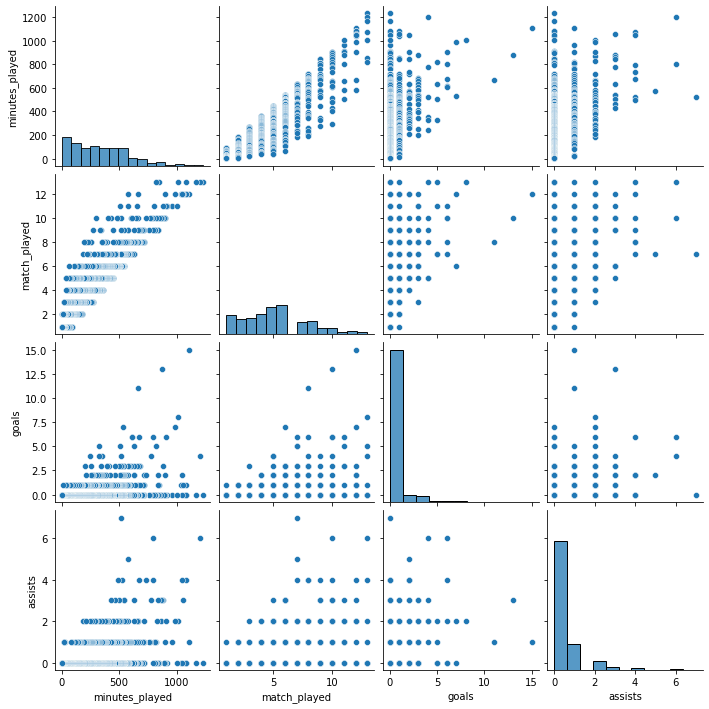

In [13]:
# Create a pair plot of entire dataset

g = sns.pairplot(sub)

In [ ]:
### more is needed to know what relationship there is between the scorers and the assistants

<AxesSubplot:xlabel='goals', ylabel='Count'>

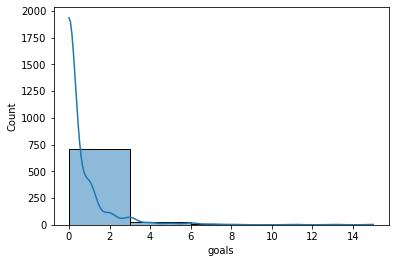

In [15]:
# Use a histogram to visualize the distribution of the dependent variable - goals
sns.histplot(df['goals'], bins = 5, kde = True)

In [18]:
#Creating a categorical variable that splits the "goal" column into categories
df.loc[df['goals'] < 3, 'goal scorer'] = 'low scorer'

In [19]:
df.loc[(df['goals'] >= 3) & (df['goals'] < 7), 'goal scorer'] = 'Middle scorer'

In [21]:
df.loc[df['goals'] >= 7, 'goal scorer'] = 'High scorer'

In [22]:
df['goal scorer'].value_counts(dropna = False)

low scorer       706
Middle scorer     35
High scorer        6
Name: goal scorer, dtype: int64

<AxesSubplot:xlabel='minutes_played', ylabel='assists'>

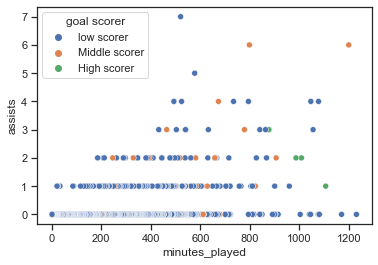

In [31]:
# Create a categorical plot in seaborn using the suicides_no and other variables

sns.set(style="ticks")
sns.scatterplot(x = 'minutes_played', y = 'assists', hue = 'goal scorer', data = df)

In [ ]:
 ### we can see which is the assists level of the players sorted by goal scorer level.

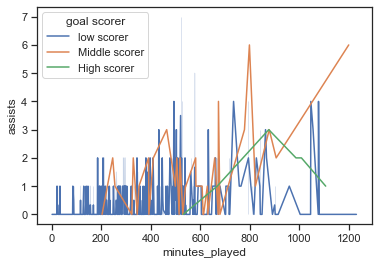

In [36]:
# Creating a line chart 
line = sns.lineplot(data = df, hue = 'goal scorer', x = 'minutes_played',y = 'assists')

In [37]:
###we can se how the middle scorer are the most assistants.